<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#Count-unique-values-in-each-categorical-feature" data-toc-modified-id="Count-unique-values-in-each-categorical-feature-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Count unique values in each categorical feature</a></span></li></ul></li><li><span><a href="#Datetime-feature" data-toc-modified-id="Datetime-feature-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Datetime feature</a></span><ul class="toc-item"><li><span><a href="#Clicks-&amp;-downloads-variance-by-hour" data-toc-modified-id="Clicks-&amp;-downloads-variance-by-hour-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Clicks &amp; downloads variance by hour</a></span></li><li><span><a href="#Clicks-&amp;-downloads-variance-by-minute" data-toc-modified-id="Clicks-&amp;-downloads-variance-by-minute-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Clicks &amp; downloads variance by minute</a></span></li><li><span><a href="#Clicks-&amp;-downloads-variance-by-second" data-toc-modified-id="Clicks-&amp;-downloads-variance-by-second-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Clicks &amp; downloads variance by second</a></span></li></ul></li><li><span><a href="#Click-&amp;-download-statistics" data-toc-modified-id="Click-&amp;-download-statistics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Click &amp; download statistics</a></span></li><li><span><a href="#Target-feature" data-toc-modified-id="Target-feature-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Target feature</a></span></li></ul></li></ul></div>

## Load

Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Data

In [2]:
!du -hs ../downloads/*.csv

187M	../downloads/sample_submission.csv
830M	../downloads/test.csv
7.0G	../downloads/train.csv
3.9M	../downloads/train_sample.csv


In [3]:
train_sample = pd.read_csv('../downloads/train_sample.csv')

In [4]:
test = pd.read_csv('../downloads/test.csv')

## Explore

In [5]:
train_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [6]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


### Missing values

In [7]:
train_sample.isnull().mean()

ip                 0.00000
app                0.00000
device             0.00000
os                 0.00000
channel            0.00000
click_time         0.00000
attributed_time    0.99773
is_attributed      0.00000
dtype: float64

In [8]:
test.isnull().mean()

click_id      0.0
ip            0.0
app           0.0
device        0.0
os            0.0
channel       0.0
click_time    0.0
dtype: float64

No missing values to worry about.

### Categorical features

In [9]:
cat_cols = ['ip', 'app', 'device', 'os', 'channel']

#### Count unique values in each categorical feature

In [10]:
from helper.plotting import plot_df_nunique

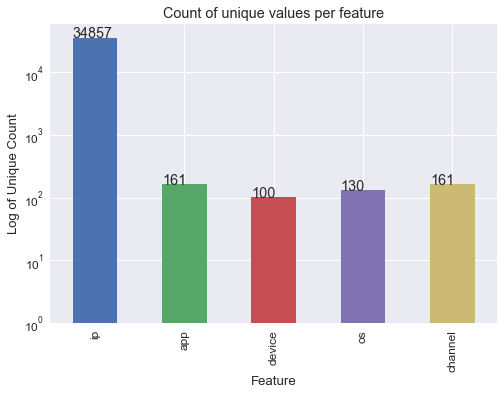

In [11]:
plot_df_nunique(train_sample, cat_cols, log_scale=True)

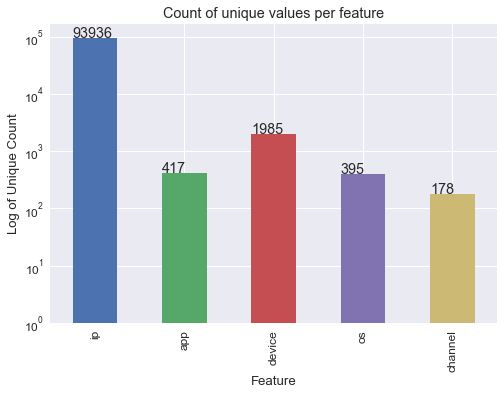

In [12]:
plot_df_nunique(test, cat_cols, log_scale=True)

### Datetime feature

In [13]:
train_sample['click_time'] = pd.to_datetime(train_sample.click_time)

In [14]:
train_sample['click_hour'] = train_sample['click_time'].dt.hour
train_sample['click_minute'] = train_sample['click_time'].dt.minute
train_sample['click_second'] = train_sample['click_time'].dt.second

In [15]:
attributed = train_sample[train_sample.is_attributed==1]

#### Clicks & downloads variance by hour

In [41]:
from helper.plotting import barplot_value_counts_by_col

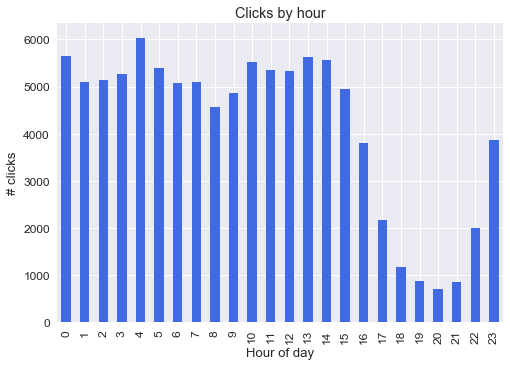

In [17]:
barplot_value_counts_by_col(train_sample, col='click_hour', 
                            ascending_index=True, title='Clicks by hour',
                            xlabel='Hour of day', ylabel='# clicks')

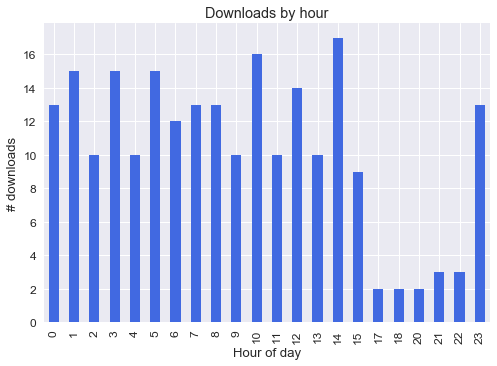

In [18]:
barplot_value_counts_by_col(attributed, col='click_hour', 
                            ascending_index=True, title='Downloads by hour',
                            xlabel='Hour of day', ylabel='# downloads')

[Text(0,0.5,'ratio'), Text(0.5,0,'Hour of day')]

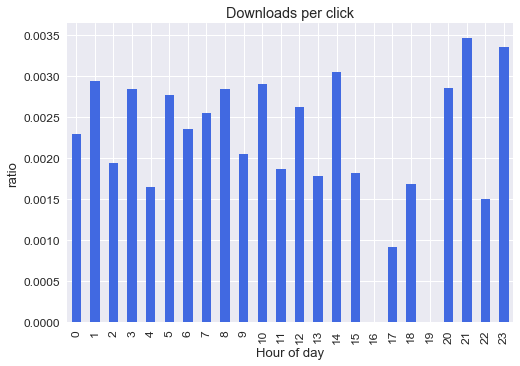

In [22]:
downloads_per_click_by_hour = attributed['click_hour'].value_counts().sort_index()/train_sample['click_hour'].value_counts().sort_index()
ax = downloads_per_click_by_hour.plot.bar(color=['royalblue'])
ax.set_title('Downloads per click')
ax.set(xlabel='Hour of day', ylabel='ratio')

#### Clicks & downloads variance by minute

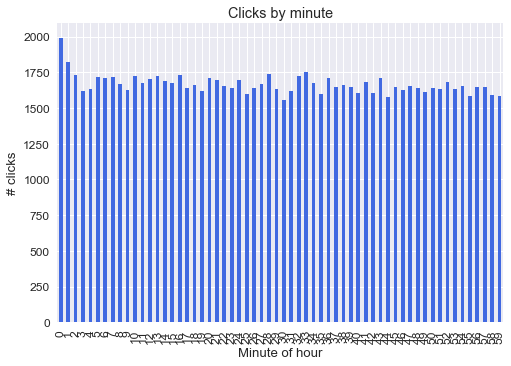

In [27]:
barplot_value_counts_by_col(train_sample, col='click_minute', 
                            ascending_index=True, title='Clicks by minute',
                            xlabel='Minute of hour', ylabel='# clicks')

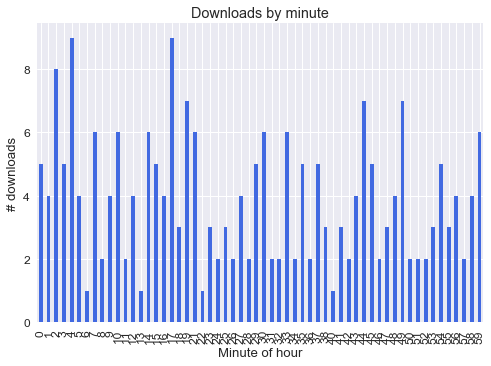

In [25]:
barplot_value_counts_by_col(attributed, col='click_minute', 
                            ascending_index=True, title='Downloads by minute',
                            xlabel='Minute of hour', ylabel='# downloads')

[Text(0,0.5,'ratio'), Text(0.5,0,'Minute of hour')]

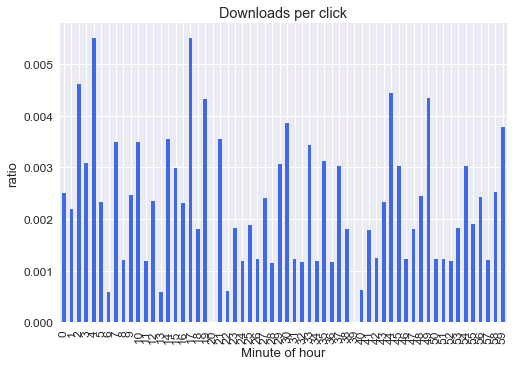

In [26]:
clicks_by_minute = train_sample['click_minute'].value_counts().sort_index()
downloads_by_minute = train_sample[train_sample.is_attributed==1]['click_minute'].value_counts().sort_index()
downloads_per_click_by_minute = downloads_by_minute/clicks_by_minute
ax = downloads_per_click_by_minute.plot.bar(color=['royalblue'])
ax.set_title('Downloads per click')
ax.set(xlabel='Minute of hour', ylabel='ratio')

#### Clicks & downloads variance by second

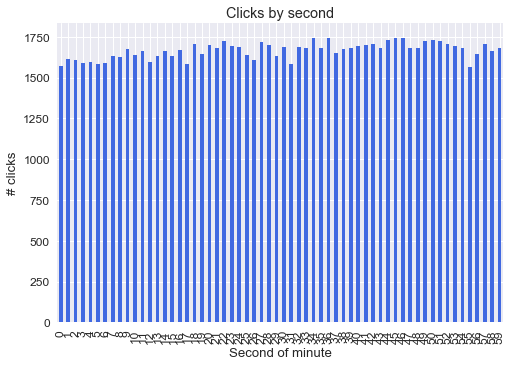

In [28]:
barplot_value_counts_by_col(train_sample, col='click_second', 
                            ascending_index=True, title='Clicks by second',
                            xlabel='Second of minute', ylabel='# clicks')

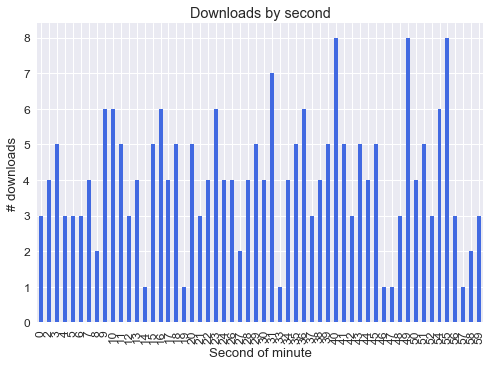

In [29]:
barplot_value_counts_by_col(attributed, col='click_second', 
                            ascending_index=True, title='Downloads by second',
                            xlabel='Second of minute', ylabel='# downloads')

[Text(0,0.5,'ratio'), Text(0.5,0,'Second of minute')]

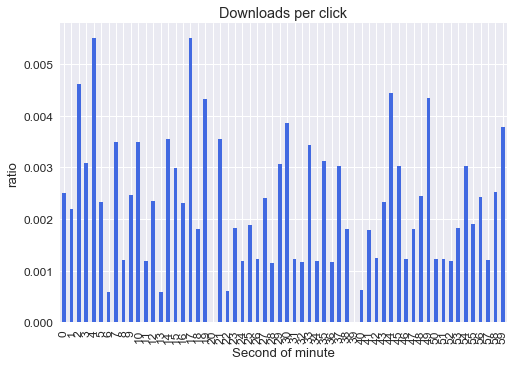

In [47]:
clicks_by_second = train_sample['click_second'].value_counts().sort_index()
downloads_by_second = attributed['click_second'].value_counts().sort_index()
downloads_per_click_by_second = downloads_by_second/clicks_by_second
ax = downloads_per_click_by_minute.plot.bar(color=['royalblue'])
ax.set_title('Downloads per click')
ax.set(xlabel='Second of minute', ylabel='ratio')

Conclusion:

Hour, minute, and second matters.

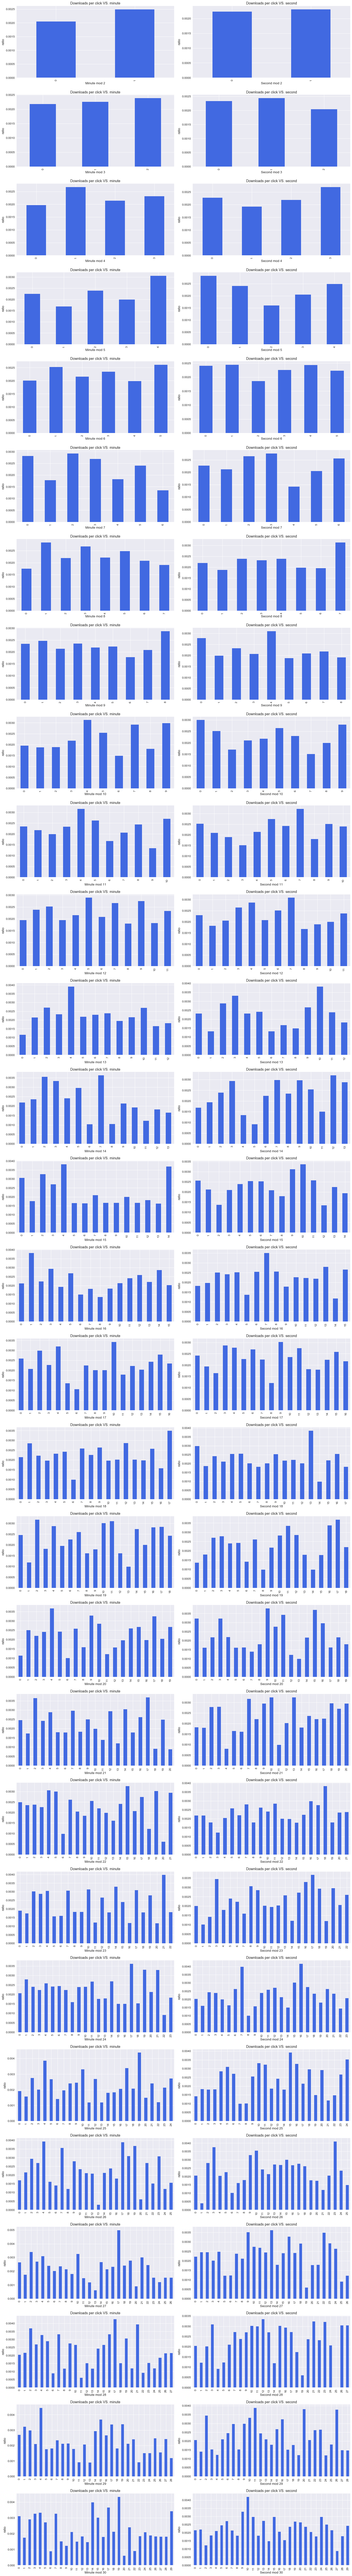

In [52]:
mods = range(2, 31)
fg, ax = plt.subplots(nrows=len(mods), ncols=2, figsize=[20, len(mods)*5])
for row, m in enumerate(mods):
    minute_col = 'click_minute_mod'+str(m)
    second_col = 'click_second_mod'+str(m)
    train_sample[minute_col] = train_sample['click_minute'] % m
    train_sample[second_col] = train_sample['click_second'] % m
    attributed = train_sample[train_sample.is_attributed==1]
    
    clicks_by_minute = train_sample[minute_col].value_counts().sort_index()
    downloads_by_minute = attributed[minute_col].value_counts().sort_index()
    downloads_per_click_by_minute = downloads_by_minute/clicks_by_minute
    ax0 = downloads_per_click_by_minute.plot.bar(color=['royalblue'], ax=ax[row][0])
    ax0.set_title('Downloads per click VS. minute')
    ax0.set(xlabel='Minute mod {}'.format(m), ylabel='ratio')
    
    clicks_by_second = train_sample[second_col].value_counts().sort_index()
    downloads_by_second = attributed[second_col].value_counts().sort_index()
    downloads_per_click_by_second = downloads_by_second/clicks_by_second
    ax1 = downloads_per_click_by_second.plot.bar(color=['royalblue'], ax=ax[row][1])
    ax1.set_title('Downloads per click VS. second')
    ax1.set(xlabel='Second mod {}'.format(m), ylabel='ratio')
    
plt.tight_layout()

Fingding: `click_minute mod 15` and `click_second mod 5` can be useful features.

### Click & download statistics

In [105]:
stats_by_ = {}
for ft in cat_cols:
    stats = train_sample.groupby(ft).agg({'is_attributed': ['size', 'sum']})
    stats.columns = stats.columns.droplevel(0)
    cl_colname, dl_colname, ratio_colname = map(lambda col: col+'_by_'+ft, ['clicks', 'downloads', 'download_ratio'])
    stats.rename(columns={'size':cl_colname, 'sum':dl_colname}, inplace=True)
    stats[ratio_colname] = stats[dl_colname] / stats[cl_colname]
    stats_by_[ft] = stats
    display(stats_by_[ft].sort_values(by=dl_colname, ascending=False).head(15))

,clicks_by_ip,downloads_by_ip,download_ratio_by_ip
ip,,,
5348,669,3,0.004484
5314,616,3,0.004870
171892,1,1,1.000000
346097,1,1,1.000000
29016,4,1,0.250000
344369,1,1,1.000000
265917,1,1,1.000000
35308,12,1,0.083333
344551,1,1,1.000000


,clicks_by_app,downloads_by_app,download_ratio_by_app
app,,,
19,478,70,0.146444
35,49,27,0.551020
29,360,22,0.061111
10,388,18,0.046392
5,188,14,0.074468
45,36,11,0.305556
9,8992,8,0.000890
72,16,6,0.375000
18,8315,5,0.000601


,clicks_by_device,downloads_by_device,download_ratio_by_device
device,,,
1,94338,146,0.001548
0,541,52,0.096118
97,5,3,0.600000
16,7,3,0.428571
21,3,2,0.666667
2,4345,2,0.000460
188,1,1,1.000000
180,1,1,1.000000
579,1,1,1.000000


,clicks_by_os,downloads_by_os,download_ratio_by_os
os,,,
19,23870,41,0.001718
0,199,26,0.130653
24,194,26,0.134021
13,21223,25,0.001178
29,56,11,0.196429
21,60,8,0.133333
27,1008,6,0.005952
22,4039,6,0.001486
17,5232,6,0.001147


,clicks_by_channel,downloads_by_channel,download_ratio_by_channel
channel,,,
213,416,72,0.173077
113,266,31,0.116541
21,180,19,0.105556
101,1180,13,0.011017
274,17,12,0.705882
347,507,11,0.021696
282,17,5,0.294118
243,206,5,0.024272
5,7,5,0.714286


### Target feature

In [ ]:
target_col = 'is_attributed'

In [ ]:
train_sample[target_col].value_counts(normalize=True)

Target feature is highly **IMBLANCED**! Only around 0.2% clicks led to downloads.